In [1]:
from google.colab import files
files.upload()  # upload kaggle.json here


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hitarthdoshi08","key":"76968a54f5acebb346ee643e982166a5"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip chest-xray-pneumonia.zip -d chest_xray_data


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray_data/chest_xray/train/NO

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [ ]:
train_dir = 'chest_xray_data/chest_xray/train'
val_dir = 'chest_xray_data/chest_xray/val'
test_dir = 'chest_xray_data/chest_xray/test'

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // 32
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.7498 - loss: 0.5367

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 73s 414ms/step - accuracy: 0.7502 - loss: 0.5360 - val_accuracy: 0.8125 - val_loss: 0.6777
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 400ms/step - accuracy: 0.9054 - loss: 0.2372 - val_accuracy: 0.7500 - val_loss: 0.9452
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 401ms/step - accuracy: 0.9181 - loss: 0.2157 - val_accuracy: 0.6875 - val_loss: 1.3884
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 403ms/step - accuracy: 0.9288 - loss: 0.1964 - val_accuracy: 0.6875 - val_loss: 0.9296
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 398ms/step - accuracy: 0.9404 - loss: 0.1629 - val_accuracy: 0.6250 - val_loss: 2.4145
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 399ms/step - accuracy: 0.9352 - loss: 0.1629 - val_accuracy: 0.8750 - val_loss: 0.4000
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 398ms/step - accuracy: 0.9356 - loss: 0.1589 - val_accuracy: 0.6250 - val_loss: 1.0816
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 82s 399ms/step - accuracy: 0.9439 - loss: 0.1535 - val

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.7679 - loss: 0.7021
Test accuracy: 77.56%


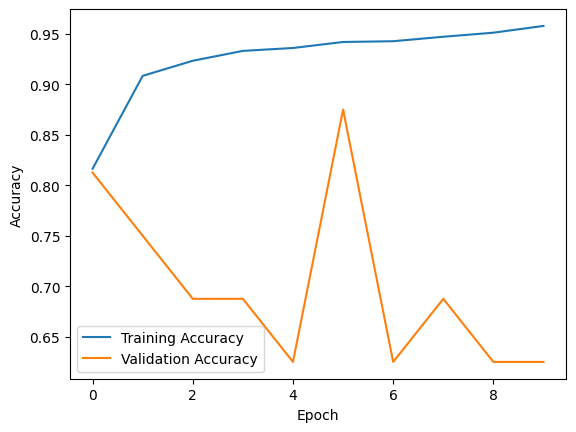

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
model.save('pneumonia_cnn_model.h5')


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import os

# Load your trained model
from tensorflow.keras.models import load_model
model = load_model('pneumonia_cnn_model.h5')

# Class labels
class_labels = ['Normal', 'Pneumonia']

def detect_and_display(img_path, model, true_label=None, image_size=150):
    """
    Function to predict Pneumonia/Normal on a chest X-ray image,
    display the image with predicted label, confidence, and true label for comparison.
    """
    try:
        # Load and preprocess image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)[0][0]
        confidence = prediction if prediction >= 0.5 else 1 - prediction
        predicted_label = 'Pneumonia' if prediction >= 0.5 else 'Normal'

        # Build title
        title = f"Predicted: {predicted_label} (Confidence: {confidence * 100:.2f}%)"
        if true_label:
            title += f"\nTrue: {true_label}"

        # Display
        plt.figure(figsize=(6,6))
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(title)
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


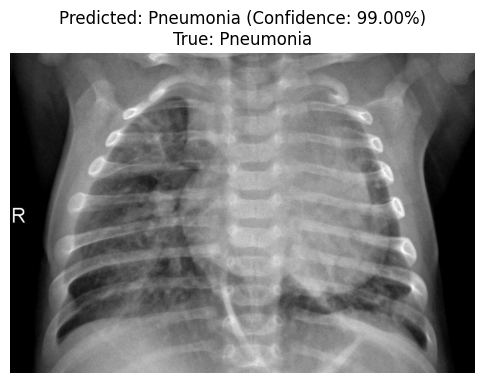

In [ ]:
img_path = 'chest_xray_data/chest_xray/test/PNEUMONIA/person100_bacteria_475.jpeg'
detect_and_display(img_path, model, true_label='Pneumonia')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


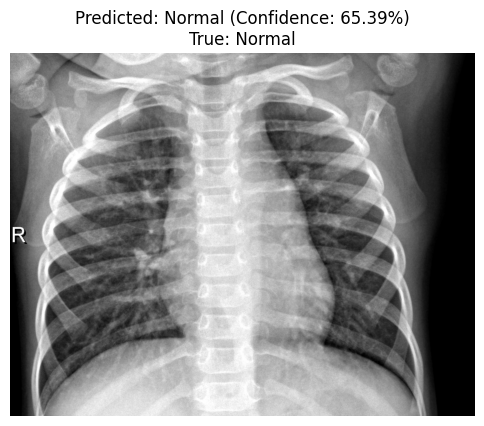

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


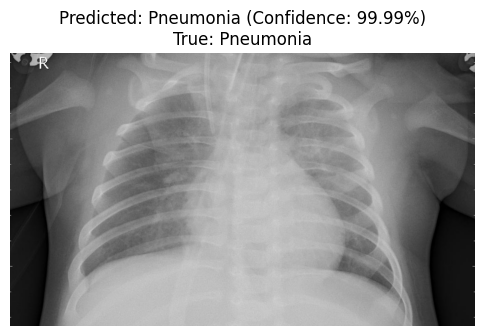

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


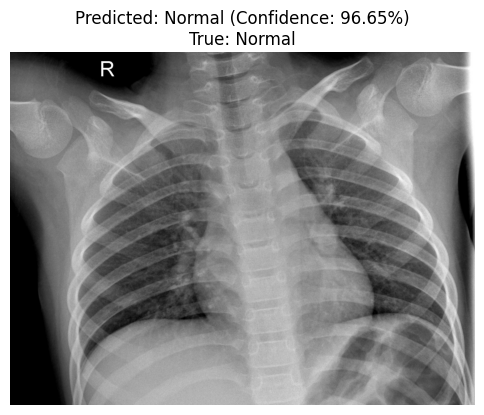

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


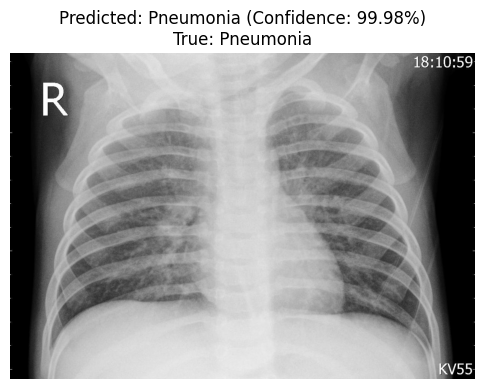

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


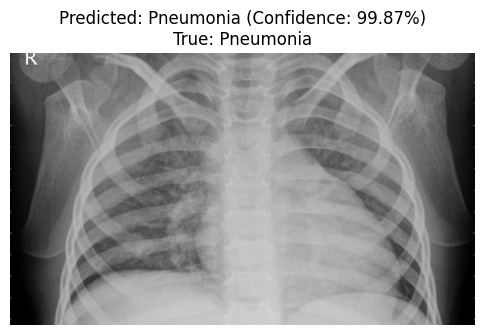

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


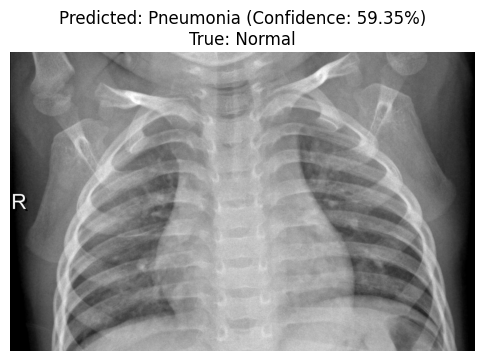

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


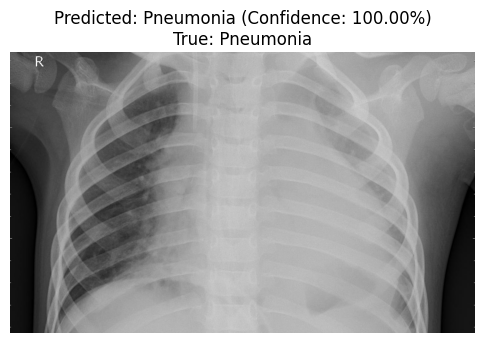

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


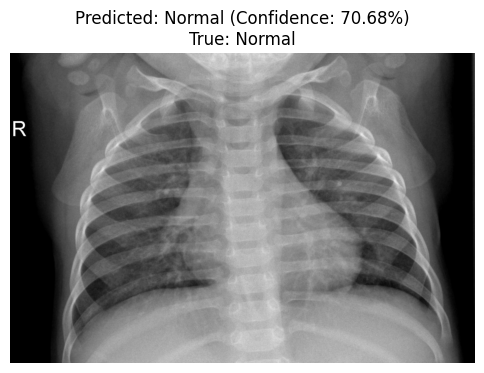

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


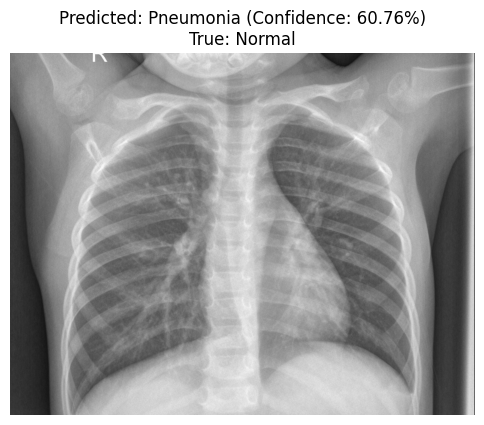

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


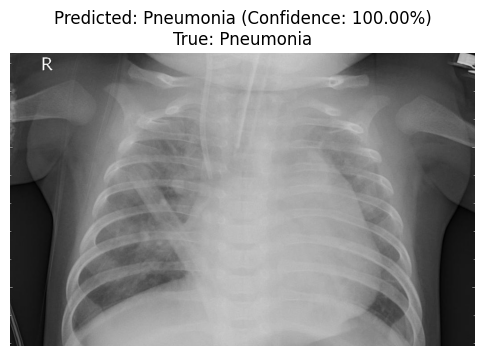

In [ ]:
import random

# Collect test paths
test_normal_dir = 'chest_xray_data/chest_xray/test/NORMAL'
test_pneumonia_dir = 'chest_xray_data/chest_xray/test/PNEUMONIA'

test_normal_paths = [os.path.join(test_normal_dir, fname) for fname in os.listdir(test_normal_dir)]
test_pneumonia_paths = [os.path.join(test_pneumonia_dir, fname) for fname in os.listdir(test_pneumonia_dir)]

# Sample 5 random Normal and 5 random Pneumonia images
sample_normal = random.sample(test_normal_paths, 5)
sample_pneumonia = random.sample(test_pneumonia_paths, 5)

sample_images = sample_normal + sample_pneumonia
sample_labels = ['Normal'] * 5 + ['Pneumonia'] * 5

# Shuffle for random display
combined = list(zip(sample_images, sample_labels))
random.shuffle(combined)

# Predict and display each
for img_path, true_label in combined:
    detect_and_display(img_path, model, true_label=true_label)


In [ ]:
!gdown 1Z7K4YjuivA5jZgJ5j2W6lQSRKmRPXzR8
!unzip nih_subset.zip


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Z7K4YjuivA5jZgJ5j2W6lQSRKmRPXzR8

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open nih_subset.zip, nih_subset.zip.zip or nih_subset.zip.ZIP.


In [ ]:
!gdown 1GmTf7pOvxgOszuYlKy9ORL-aKmD9Edxb
!unzip nih_subset_14diseases.zip


Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1GmTf7pOvxgOszuYlKy9ORL-aKmD9Edxb

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open nih_subset_14diseases.zip, nih_subset_14diseases.zip.zip or nih_subset_14diseases.zip.ZIP.


In [ ]:
from google.colab import files
files.download('pneumonia_cnn_model.h5')


FileNotFoundError: Cannot find file: pneumonia_cnn_model.h5

In [ ]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Jul  1 21:04 sample_data


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
model.save('pneumonia_cnn_model.h5')

NameError: name 'plt' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os